<a href="https://colab.research.google.com/github/JuanCastrillonL/Data-Integration-Analytics/blob/main/2_1_POO_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programación Orientada por Objetos**
0. Se procede con la carga de las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis  #Coeficiente de Asimetría,Kurtosis

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
nxl='/content/drive/MyDrive/2. IntegraciónDatos(01-2025)/2. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(100)

Xf=XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA=np.multiply(Xf,Xs) #Es el producto entre las dos variables
dfLDA=pd.DataFrame(LDA) #Guardamos los datos en una tabla

3. Se crea la función muestreo

In [ ]:
def muestreo(ND,dfLDA,p): #Variables de entrada,
  #ND: Número de datos de muestreo
  #dfLDA: Son los datos enviados al método
  #Método: forma hacer las cosas
  #p: Es la confiabilidad dle muestrceo

  LDAm=dfLDA.sample(n=ND,replace=True)
  media=np.mean(LDAm)
  LI=media+1.96*np.std(LDAm)
  LS=media-1.96*np.std(LDAm)

  plt.figure()
  sns.histplot(LDAm,kde=True)
  plt.show()

  cas=skew(LDAm)
  kur=kurtosis(LDAm)

  ek2=((1.96**2)*p*(1-p)/ND)

  return media,LDAm,LI,LS,cas,kur,ek2 #Que quiero que esto me arroje: Variables de Salida
                    #Este método me entrega la media, y los datos
                    #muestreados

In [ ]:
def tipodist(ccas,k):

  if abs(cas)<0.5 and abs(ck)<0.5:
    tpdst="Posible distribución Normal"
  elif cas>0 and ck>3:
    if ck>=8:
      tpdst="Posible Distribución Exponencial"
    elif ck>=6:
      tpdst="Posible Distribución Gamma"
    else:
      tpdst="Posible Distribución Weibull"

  elif cas<0 and ck<3:
    tpdst="Posible Distribución Beta"
  elif ck<3:
    tpdst="Posible Distribución Uniforme"
  else:
    tpdst="No se pudo identificar la distribución"

  return tpdst #Nos va entregar el tipo de distribución

4. Se procede con el nuestreo

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


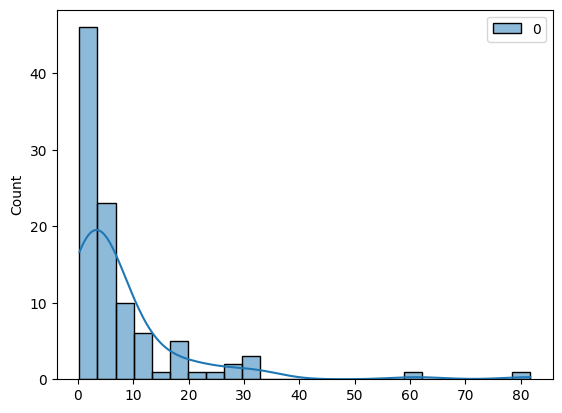

La media de los datos es: 7.887135000000001
El limite inferior es: 0    31.187329
dtype: float64
El limite superior es: 0   -15.413059
dtype: float64
El coeficiente de asimetría es: [3.66428085]
El coeficiente de curtosis es: [16.75798373]
El tipo de distribución es: Posible Distribución Exponencial
El error es: 0.00038031840000000023


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


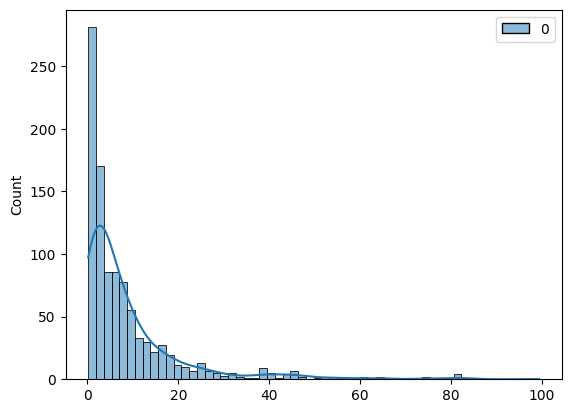

La media de los datos es: 8.802808508508509


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


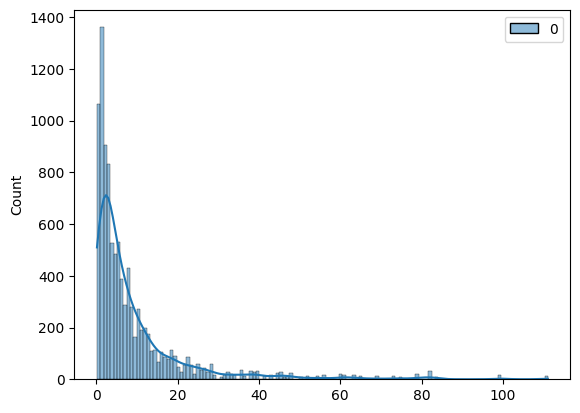

La media de los datos es: 9.235741689182428


In [ ]:
#Muestreo a una confiabilidad el 99%
media99,LDAm99,LI99,LS99,cas99,kur99,ek299=muestreo(100,dfLDA,0.99)
print("La media de los datos es:",media99)
print("El limite inferior es:",LI99)
print("El limite superior es:",LS99)
print("El coeficiente de asimetría es:",cas99)
print("El coeficiente de curtosis es:",kur99)
print("El tipo de distribución es:",tipodist(cas99,kur99))
print("El error es:",ek299)

#Muestreo a una confiabilidad del 99,9%
media999,LDAm999,LI999,LS999,cas999,kur999,ek2999=muestreo(1000,dfLDA,0.999)
print("La media de los datos es:",media999)

#Muestreo a una confiabilidad del 99,99%
media9999,LDAm9999,LI9999,LS9999,cas9999,kur9999,ek29999=muestreo(10000,dfLDA,0.9999)
print("La media de los datos es:",media9999)